<a href="https://colab.research.google.com/github/WinkLC/liuyuan/blob/master/traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
import pickle

In [3]:
!git clone https://github.com/WinkLC/liuyuan.git

Cloning into 'liuyuan'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 16 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


In [0]:
from pathlib import Path
data_dir = Path('liuyuan')

In [0]:
with open(data_dir / 'others.pickle', 'rb') as f:
    others_list = pickle.load(f)

In [0]:
with open(data_dir / 'traffic_data_list.pickle', 'rb') as f:
    traffic_data_list=pickle.load(f)

In [0]:
mypath = Path("liuyuan")
df = pd.read_csv(mypath/'data.csv')

In [8]:
df.head()

,label,speed
0,1,"[30, 26, 25, 23, 23, 26, 25, 24, 23, 19, 19, 14]"
1,1,"[25, 19, 15, 16, 20, 21, 20, 19, 20, 24, 29, 16]"
2,1,"[26, 27, 28, 32, 33, 35, 35, 35, 35, 37, 34, 15]"
3,1,"[32, 35, 37, 37, 39, 38, 39, 38, 36, 35, 34, 22]"
4,1,"[28, 35, 34, 33, 29, 26, 27, 28, 24, 16, 18, 10]"


In [9]:
df.tail(10)

,label,speed
5756,0,"[36, 32, 30, 29, 27, 28, 26, 24, 29, 30, 32, 34]"
5757,0,"[33, 29, 30, 32, 28, 26, 26, 27, 23, 19, 16, 14]"
5758,0,"[25, 29, 32, 36, 36, 36, 38, 38, 38, 40, 42, 41]"
5759,0,"[53, 52, 53, 53, 53, 52, 53, 53, 54, 54, 54, 54]"
5760,0,"[53, 50, 54, 55, 56, 52, 53, 45, 53, 47, 42, 42]"
5761,0,"[38, 37, 37, 38, 37, 35, 36, 35, 38, 36, 36, 35]"
5762,0,"[15, 27, 21, 18, 30, 24, 22, 21, 23, 27, 24, 29]"
5763,0,"[32, 32, 34, 33, 32, 35, 37, 38, 39, 39, 41, 41]"
5764,0,"[44, 41, 39, 43, 43, 39, 42, 43, 42, 41, 43, 45]"
5765,0,"[21, 26, 27, 32, 31, 29, 32, 28, 30, 35, 32, 34]"


In [10]:
import numpy as np
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [14]:
sequences =others_list+traffic_data_list
sequences[:5]

[[27, 28, 27, 27, 26, 26, 25, 23, 29, 28, 29, 28],
 [38, 34, 36, 37, 35, 36, 35, 33, 35, 35, 29, 26],
 [49, 47, 46, 47, 45, 49, 50, 45, 46, 46, 46, 46],
 [19, 23, 24, 24, 28, 29, 30, 33, 35, 34, 33, 31],
 [33, 33, 36, 34, 27, 31, 32, 33, 32, 35, 32, 36]]

In [15]:
data = pad_sequences(sequences, maxlen=12)
data

array([[27, 28, 27, ..., 28, 29, 28],
       [38, 34, 36, ..., 35, 29, 26],
       [49, 47, 46, ..., 46, 46, 46],
       ...,
       [31, 30, 33, ..., 34, 30, 14],
       [33, 35, 30, ..., 21, 15, 11],
       [45, 44, 46, ..., 44, 30, 12]], dtype=int32)

In [16]:
labels = np.array(df.label)
labels

array([1, 1, 1, ..., 0, 0, 0])

In [0]:
np.random.seed(12)

In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [0]:
training_samples = int(len(indices) * .8)
validation_samples = len(indices) - training_samples

In [0]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

In [21]:
X_train

array([[42, 41, 39, ..., 21, 14, 11],
       [23, 30, 29, ..., 17, 15, 15],
       [10, 17, 24, ..., 14, 13, 10],
       ...,
       [32, 20, 26, ..., 34, 35, 34],
       [20, 20, 20, ..., 17, 17, 19],
       [47, 47, 46, ..., 16, 17, 11]], dtype=int32)

In [0]:
num_events = 74

In [0]:
embedding_dim = 20
embedding_matrix = np.random.rand(num_events, embedding_dim)

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [41]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel_embedding_untrainable.h5")

Train on 4612 samples, validate on 1154 samples
Epoch 1/50
4612/4612 [==============================] - 3s 641us/step - loss: 0.6033 - acc: 0.6917 - val_loss: 0.6339 - val_acc: 0.6308
Epoch 2/50
4612/4612 [==============================] - 1s 289us/step - loss: 0.5005 - acc: 0.7656 - val_loss: 0.4832 - val_acc: 0.7790
Epoch 3/50
4612/4612 [==============================] - 1s 292us/step - loss: 0.4463 - acc: 0.8018 - val_loss: 0.4473 - val_acc: 0.7972
Epoch 4/50
4612/4612 [==============================] - 1s 283us/step - loss: 0.4103 - acc: 0.8246 - val_loss: 0.4102 - val_acc: 0.8180
Epoch 5/50
4612/4612 [==============================] - 1s 292us/step - loss: 0.3776 - acc: 0.8480 - val_loss: 0.3977 - val_acc: 0.8388
Epoch 6/50
4612/4612 [==============================] - 1s 301us/step - loss: 0.3547 - acc: 0.8526 - val_loss: 0.3777 - val_acc: 0.8510
Epoch 7/50
4612/4612 [==============================] - 1s 297us/step - loss: 0.3342 - acc: 0.8638 - val_loss: 0.3575 - val_acc: 0.8449


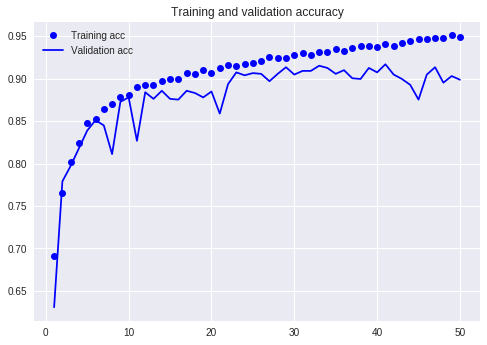

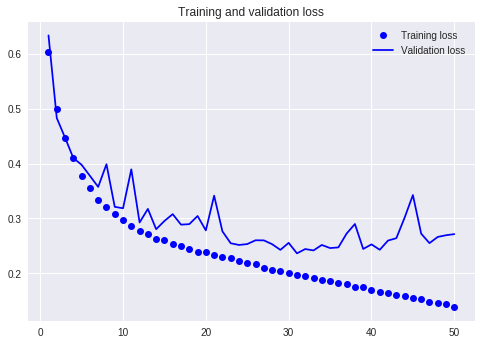

In [42]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [45]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel_embedding_trainable.h5")

Train on 4612 samples, validate on 1154 samples
Epoch 1/50
4612/4612 [==============================] - 3s 704us/step - loss: 0.5161 - acc: 0.7658 - val_loss: 0.4035 - val_acc: 0.8267
Epoch 2/50
4612/4612 [==============================] - 2s 338us/step - loss: 0.3122 - acc: 0.8838 - val_loss: 0.2606 - val_acc: 0.8934
Epoch 3/50
4612/4612 [==============================] - 1s 314us/step - loss: 0.2190 - acc: 0.9200 - val_loss: 0.2203 - val_acc: 0.9341
Epoch 4/50
4612/4612 [==============================] - 1s 321us/step - loss: 0.1848 - acc: 0.9328 - val_loss: 0.1794 - val_acc: 0.9367
Epoch 5/50
4612/4612 [==============================] - 1s 324us/step - loss: 0.1686 - acc: 0.9395 - val_loss: 0.1710 - val_acc: 0.9376
Epoch 6/50
4612/4612 [==============================] - 2s 344us/step - loss: 0.1623 - acc: 0.9410 - val_loss: 0.1690 - val_acc: 0.9376
Epoch 7/50
4612/4612 [==============================] - 2s 342us/step - loss: 0.1582 - acc: 0.9438 - val_loss: 0.1671 - val_acc: 0.9402


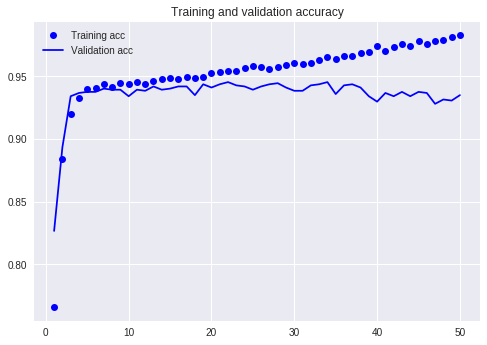

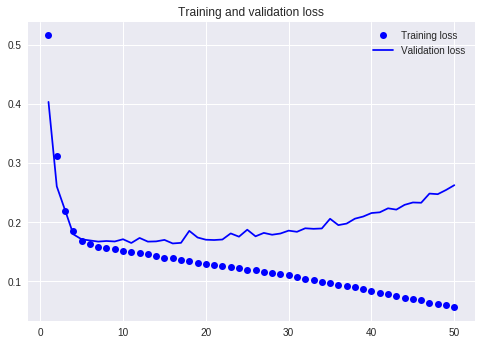

In [46]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [47]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [49]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel_embedding_trainable_with_dropout.h5")

Train on 4612 samples, validate on 1154 samples
Epoch 1/50
4612/4612 [==============================] - 4s 845us/step - loss: 0.5705 - acc: 0.7196 - val_loss: 0.3859 - val_acc: 0.8423
Epoch 2/50
4612/4612 [==============================] - 2s 383us/step - loss: 0.3499 - acc: 0.8710 - val_loss: 0.2617 - val_acc: 0.8960
Epoch 3/50
4612/4612 [==============================] - 2s 389us/step - loss: 0.2356 - acc: 0.9189 - val_loss: 0.1989 - val_acc: 0.9359
Epoch 4/50
4612/4612 [==============================] - 2s 414us/step - loss: 0.1953 - acc: 0.9328 - val_loss: 0.1847 - val_acc: 0.9376
Epoch 5/50
4612/4612 [==============================] - 2s 407us/step - loss: 0.1827 - acc: 0.9367 - val_loss: 0.1713 - val_acc: 0.9367
Epoch 6/50
4612/4612 [==============================] - 2s 421us/step - loss: 0.1701 - acc: 0.9410 - val_loss: 0.1692 - val_acc: 0.9393
Epoch 7/50
4612/4612 [==============================] - 2s 416us/step - loss: 0.1681 - acc: 0.9369 - val_loss: 0.1668 - val_acc: 0.9393


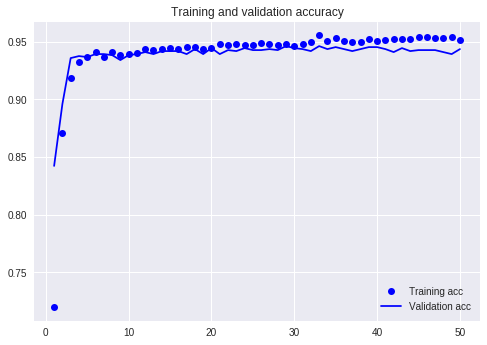

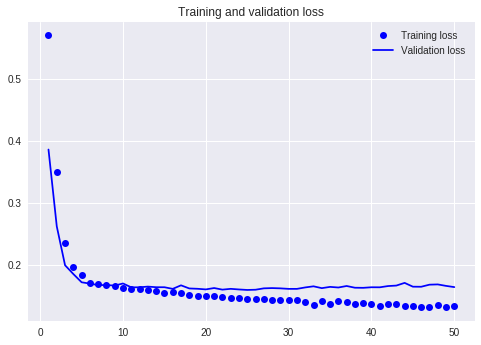

In [50]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()